## Artigo - Journal of Heat Transfer (JHT)

#### - Ao explicar a modelagem de misturas gasosas ele fala bem do método da "multipla integração" e mal do método da "convolução. Ao final como utiliza o método da "multipla integração" e o da "superposição" para encontrar a ALBDF da mistura.
#### - Para encontrar os parâmetros k_p e a_0 é utilizado o método "epsilon-epsilon" e só.

In [1]:
# Bibliotecas e importações necessarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

## Case 1 
#### As particularidades desse exemplo são:
#### - O tamanho da malha é L = 1m
#### - T = 1000k em toda a malha e T = 0k nas paredes. Obs: o nosso código não aceita T = 0k nas paredes, então foi setado T = 10k que é ali do lado
#### - As paredes são negras, ie, e = 1
#### - Concentrações molares Y_H2O = 0.2 e Y_CO2 = 0.1
#### - Para chute em "epsilon-epsilon", L_1 = 0.5m e L_2 = 1.25m

In [20]:
# Dados
DirCase1_EpsEps = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/2°Version/Results/Simulation_solovjovJHT2011_Subcase1_epsilon-epsilon.csv'
DirCase1_SimuArt = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Analysis/JournalOfHeatTransfer/Case1/SimulationsArticleCase1.csv'

# Carrega-los
DataCase1_EpsEps = pd.read_csv(DirCase1_EpsEps, skiprows=2, header=None)
DataCase1_SimuArt = pd.read_csv(DirCase1_SimuArt, skiprows=2, header=None)

# Nome das colunas
DataCase1_EpsEps.columns = ['x', 'T', 'xh2o', 'xco2', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase1_SimuArt.columns = ['x', 'T', 'xh2o', 'xco2', 'S', 'qx', 'Xq_SLW1', 'Q_SLW1', 'Xq_SLW', 'Q_SLW', 'Xs_SLW1', 'Ss_SLW1', 'Xs_SLW', 'Ss_SLW']

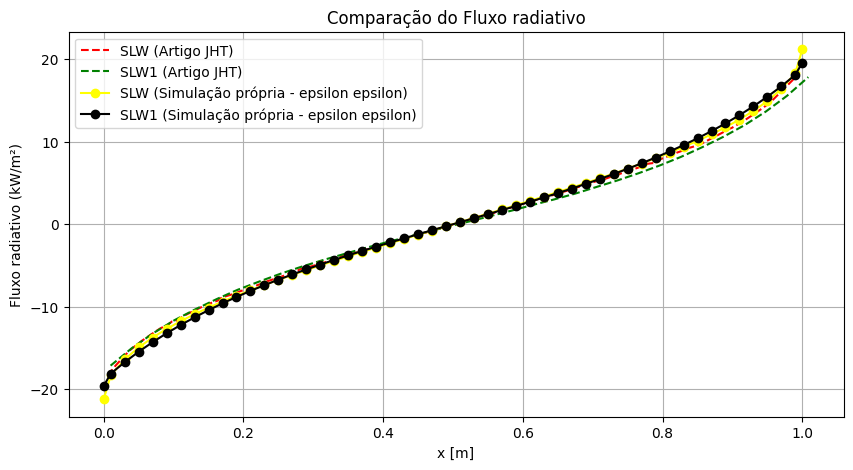

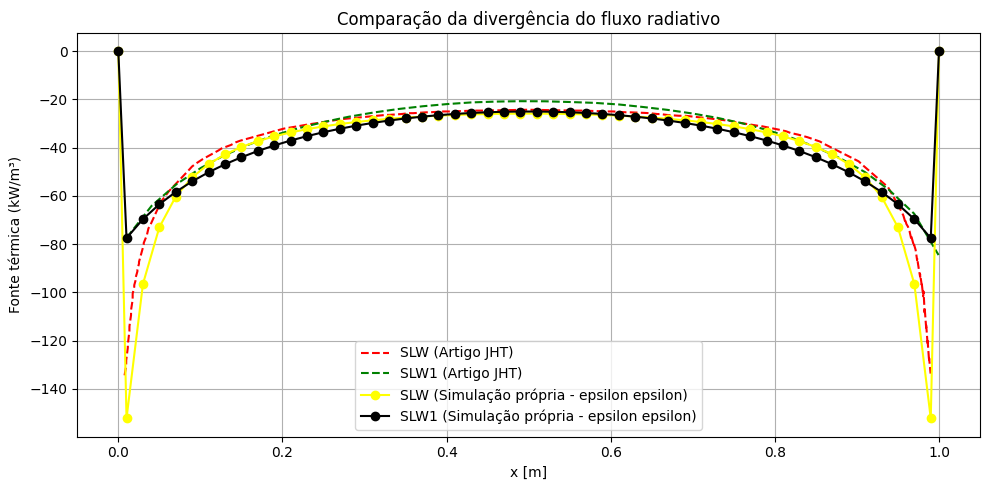

In [21]:
# Analises
plt.figure(figsize=(10, 5))
plt.plot(DataCase1_SimuArt['Xq_SLW'], DataCase1_SimuArt['Q_SLW'], '--', label='SLW (Artigo JHT)', color='red')
plt.plot(DataCase1_SimuArt['Xq_SLW1'], DataCase1_SimuArt['Q_SLW1'], '--', label='SLW1 (Artigo JHT)', color='green')
plt.plot(DataCase1_EpsEps['x'], DataCase1_EpsEps['q_SLW'], '-o', label='SLW (Simulação própria - epsilon epsilon)', color='yellow')
plt.plot(DataCase1_EpsEps['x'], DataCase1_EpsEps['q_SLW1'], '-o', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')
plt.xlabel('x [m]')
plt.ylabel('Fluxo radiativo (kW/m²)')
plt.title('Comparação do Fluxo radiativo')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(DataCase1_SimuArt['Xs_SLW'], DataCase1_SimuArt['Ss_SLW'], '--', label='SLW (Artigo JHT)', color='red')
plt.plot(DataCase1_SimuArt['Xs_SLW1'], DataCase1_SimuArt['Ss_SLW1'], '--', label='SLW1 (Artigo JHT)', color='green')
plt.plot(DataCase1_EpsEps['x'], DataCase1_EpsEps['S_SLW'], '-o', label='SLW (Simulação própria - epsilon epsilon)', color='yellow')
plt.plot(DataCase1_EpsEps['x'], DataCase1_EpsEps['S_SLW1'], '-o', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')
plt.xlabel('x [m]')
plt.ylabel('Fonte térmica (kW/m³)')
plt.title('Comparação da divergência do fluxo radiativo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Case 2
#### Após o 1° exemplo, o caso 2 é a introdução e modelagem de fuligem no artigo. Veja abaixo o paralelo que ele faz:

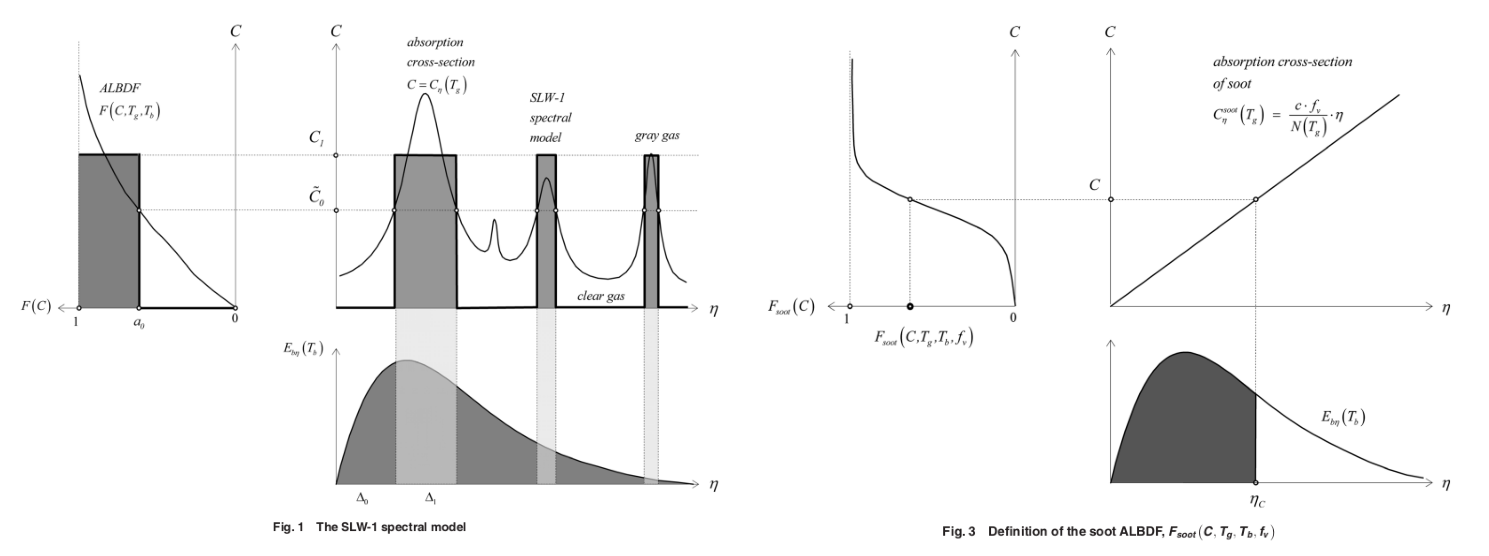

In [4]:
img1 = Image.open('Case2/Images/ALBDFGases.png')
img2 = Image.open('Case2/Images/ALBDFSoot.png')

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### A direita, ele utiliza essa seção de choque linear como a caracterização da fuligem, diferente da seção pelas linhas espectrais, conforme esquerda.
#### Após isso, ele ilustra como se comporta o fluxo da modelagem de um caso genárico só com fuligem, sem gases participantes. Ele mostra como fica as curvas e faz uma discussão depois.
#### Depois disso ele introduz fuligem com os gases participantes, e ainda coloca o meio não isotermico. Na hora de falar quanto a mistura, ele introduz os dois métodos já ditos: "superposição" e "multiplicação".
#### Nos próximos exemplos, ele não menciona fuligem explicitamente em todos, mas ele finaliza esse caso dizendo que os próximos exemplos serão para ilustar a modelagem de fuligem-gases.

In [ ]:
#############################################################################################################################################

## Case 3
#### Aqui é o primeiro exemplo pós a modelagem feita anteriormente. Ele não menciona fuligem, só gases
#### - O tamanho da malha é L = 3m
#### - O meio é não-isotermico, com T(x) = 700 - 300.cos(pi.x/L) 
#### - As paredes são cinza, com e = 0,8
#### - Concentrações molares Y_H2O(x) = 0,2 - 0,15.cos(pi.x/L) e Y_CO2(x) = (2/3).Y_H2O(x)
#### - Não é dito os chutes para os comprimentos iniciais em "epsilon-epsilon", L_1 = 0.5m e L_2 = 1.25m

In [22]:
# Dados
DirCase3_EpsEps = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/2°Version/Results/Simulation_solovjovJHT2011_Subcase3_epsilon-epsilon.csv'
DirCase3_KpEps = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/2°Version/Results/Simulation_solovjovJHT2011_Subcase3_kp-epsilon.csv'
DirCase3_SimuArt = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Analysis/JournalOfHeatTransfer/Case3/SimulationsArticleCase3.csv'

# Carrega-los
DataCase3_EpsEps = pd.read_csv(DirCase3_EpsEps, skiprows=2, header=None)
DataCase3_KpEps = pd.read_csv(DirCase3_KpEps, skiprows=2, header=None)
DataCase3_SimuArt = pd.read_csv(DirCase3_SimuArt, skiprows=2, header=None)

# Nome das colunas
DataCase3_EpsEps.columns = ['x', 'T', 'xh2o', 'xco2', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase3_KpEps.columns = ['x', 'T', 'xh2o', 'xco2', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase3_SimuArt.columns = ['x_SLW1', 'S_SLW1', 'x_SLW', 'S_SLW', 'x_LBL', 'S_LBL']

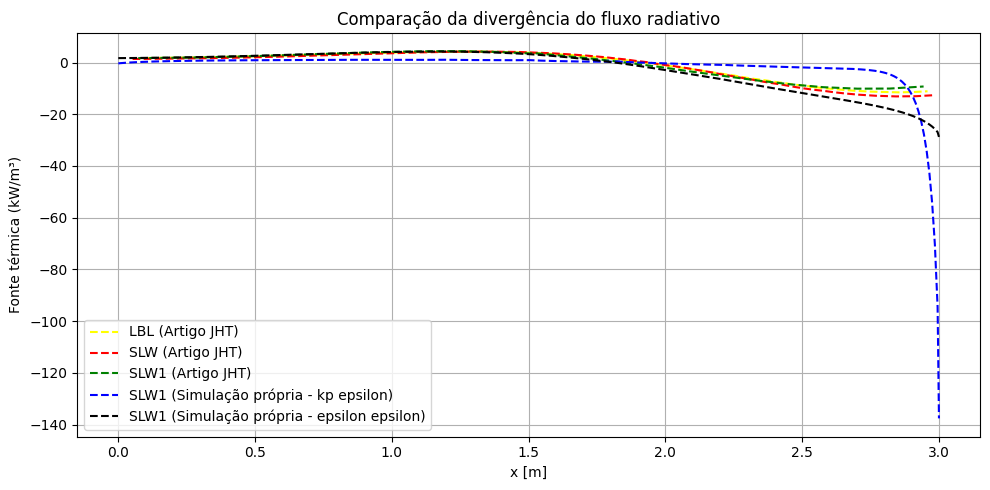

In [24]:
# Analises
plt.figure(figsize=(10, 5))
plt.plot(DataCase3_SimuArt['x_LBL'], DataCase3_SimuArt['S_LBL'], '--', label='LBL (Artigo JHT)', color='yellow')
plt.plot(DataCase3_SimuArt['x_SLW'], DataCase3_SimuArt['S_SLW'], '--', label='SLW (Artigo JHT)', color='red')
plt.plot(DataCase3_SimuArt['x_SLW1'], DataCase3_SimuArt['S_SLW1'], '--', label='SLW1 (Artigo JHT)', color='green')
plt.plot(DataCase3_KpEps['x'], DataCase3_KpEps['S_SLW1'], '--', label='SLW1 (Simulação própria - kp epsilon)', color='blue')
plt.plot(DataCase3_EpsEps['x'], DataCase3_EpsEps['S_SLW1'], '--', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')
plt.xlabel('x [m]')
plt.ylabel('Fonte térmica (kW/m³)')
plt.title('Comparação da divergência do fluxo radiativo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#############################################################################################################################################

## Case 4
#### É um exemplo de mistura de gases em meio não isotérmico, e ele não menciona de fuligem
#### - O tamanho da malha é L = 10m
#### - O meio é não-isotermico, com T(x) = 100 + 500.cos(pi.x/L). As parede estão a T = 500k 
#### - As paredes são negras, e = 1
#### - Concentrações molares Y_H2O(x) = 0,5 - 0,5.cos(pi.x/L) e Y_CO2(x) = 0,5 + 0,5.cos(pi.x/L)
#### - Não é dito os chutes para os comprimentos iniciais em "epsilon-epsilon", L_1 = 0.5m e L_2 = 1.25m

In [25]:
# Dados
DirCase4_EpsEps = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/2°Version/Results/Simulation_solovjovJHT2011_Subcase4_epsilon-epsilon.csv'
DirCase4_KpEps = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Codes/2°Version/Results/Simulation_solovjovJHT2011_Subcase4_kp-epsilon.csv'
DirCase4_SimuArt = '~/Leandro_2/Unicamp/Extracurriculares/IC_RadiativeTransfer/Git/IC_Radiation_Transfer/Analysis/JournalOfHeatTransfer/Case4/SimulationsArticleCase4.csv'

# Carrega-los
DataCase4_EpsEps = pd.read_csv(DirCase4_EpsEps, skiprows=2, header=None)
DataCase4_KpEps = pd.read_csv(DirCase4_KpEps, skiprows=2, header=None)
DataCase4_SimuArt = pd.read_csv(DirCase4_SimuArt, skiprows=2, header=None)

# Nome das colunas
DataCase4_EpsEps.columns = ['x', 'T', 'xh2o', 'xco2', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase4_KpEps.columns = ['x', 'T', 'xh2o', 'xco2', 'S_LBL', 'S_SLW', 'S_SLW1', 'q_LBL', 'q_SLW', 'q_SLW1']
DataCase4_SimuArt.columns = ['x_SLW1', 'S_SLW1', 'x_SLW', 'S_SLW', 'x_LBL', 'S_LBL']

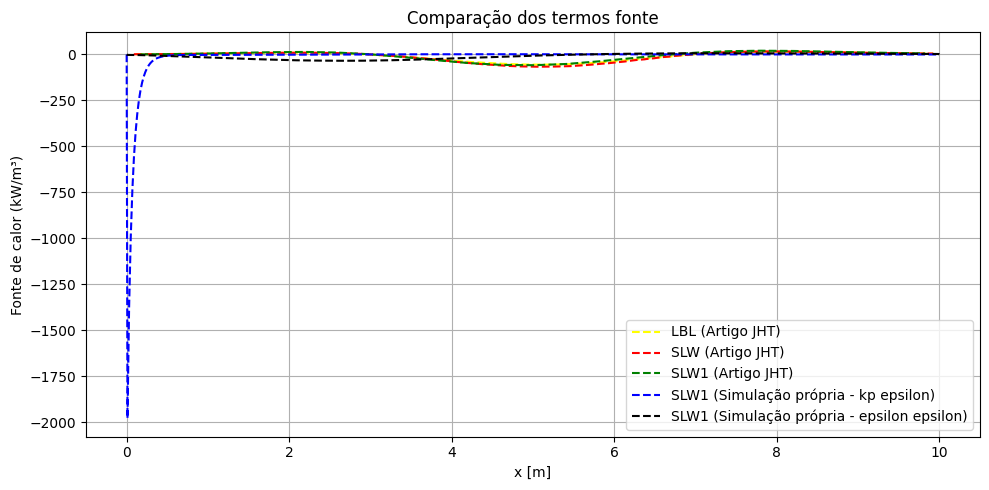

In [26]:
# Analises
plt.figure(figsize=(10, 5))
plt.plot(DataCase4_SimuArt['x_LBL'], DataCase4_SimuArt['S_LBL'], '--', label='LBL (Artigo JHT)', color='yellow')
plt.plot(DataCase4_SimuArt['x_SLW'], DataCase4_SimuArt['S_SLW'], '--', label='SLW (Artigo JHT)', color='red')
plt.plot(DataCase4_SimuArt['x_SLW1'], DataCase4_SimuArt['S_SLW1'], '--', label='SLW1 (Artigo JHT)', color='green')
plt.plot(DataCase4_KpEps['x'], DataCase4_KpEps['S_SLW1'], '--', label='SLW1 (Simulação própria - kp epsilon)', color='blue')
plt.plot(DataCase4_EpsEps['x'], DataCase4_EpsEps['S_SLW1'], '--', label='SLW1 (Simulação própria - epsilon epsilon)', color='black')

plt.xlabel('x [m]')
plt.ylabel('Fonte de calor (kW/m³)')
plt.title('Comparação dos termos fonte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()